# OpenPose 3D Reconstruction Multiple Camera Test

### Import libraries

In [2]:
import cv2, matplotlib, winsound, time, glob, yaml
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

### Camera Calibration (done)

In [ ]:
# # termination criteria
# criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# # prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
# objp = np.zeros((6*8,3), np.float32)
# objp[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2)

# # Arrays to store object points and image points from all the images.
# objpoints = [] # 3d point in real world space
# imgpoints = [] # 2d points in image plane.

# # change directory 
# %cd C:\Users\Morio Murase\seat\download\openpose\examples\media\calibrate2
# images = glob.glob('*.jpg')
# for fname in images:
#     img = cv2.imread(fname)
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     # Find the chess board corners
#     ret, corners = cv2.findChessboardCorners(gray, (8,6), None)
#     # If found, add object points, image points (after refining them)
#     if ret == True:
#         objpoints.append(objp)
#         corners2 = cv2.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
#         imgpoints.append(corners)
#         # Draw and display the corners
#         cv2.drawChessboardCorners(img, (7,6), corners2, ret)
#         cv2.imshow('img', img)
#         cv2.waitKey(500)
# cv2.destroyAllWindows()

# # calibrate camera 
# ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# # refine camera matrix
# img = cv2.imread('WIN_20200115_08_59_24_Pro.jpg')
# h,  w = img.shape[:2]
# newcameramtx, roi = cv2.getOptimalNewCameraMatrix(mtx, dist, (w,h), 1, (w,h))

# # undistort
# dst = cv2.undistort(img, mtx, dist, None, newcameramtx)

# # crop the image
# x, y, w, h = roi
# dst = dst[y:y+h, x:x+w]
# cv2.imwrite('calibresult.png', dst)
# #cv2.imshow('image',dst)
# time.sleep(10)
# cv2.destroyAllWindows()

In [3]:
# calibration result
x = 2
y = 7
w = 1911
h = 1066
newcameramtx = np.array([[1.44452466e+03, 0.00000000e+00, 9.25707623e+02],
 [0.00000000e+00, 1.44352832e+03, 5.37087150e+02],
 [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

mtx = np.array([[1.47742530e+03, 0.00000000e+00, 9.24360781e+02],
 [0.00000000e+00, 1.47529960e+03, 5.36733275e+02],
 [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

dist = np.array([[-0.05567137, -0.08386561,  0.00039717,  0.00061317,  0.21616431]])
print([x,y,w,h,])
print(newcameramtx)
print(mtx)
print(dist)

# capture video from multiple cameras
cam2 = cv2.VideoCapture(2) ############## takes few seconds to finish this command
cam3 = cv2.VideoCapture(1) ############## takes few seconds to finish this command
cameras = [cam2,cam3]

[2, 7, 1911, 1066]
[[1.44452466e+03 0.00000000e+00 9.25707623e+02]
 [0.00000000e+00 1.44352832e+03 5.37087150e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[1.47742530e+03 0.00000000e+00 9.24360781e+02]
 [0.00000000e+00 1.47529960e+03 5.36733275e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[-0.05567137 -0.08386561  0.00039717  0.00061317  0.21616431]]


## Get DATA: 2D keypoints and Images

C:\Users\Morio Murase\seat\download\openpose
Starting OpenPose demo...
Configuring OpenPose...
Flag `write_keypoint` is deprecated and will eventually be removed. Please, use `write_json` instead.
Starting thread(s)...
---------------------------------- WARNING ----------------------------------
We have introduced an additional boost in accuracy in the CUDA version of about 0.2% with respect to the CPU/OpenCL versions. We will not port this to CPU given the considerable slow down in speed it would add to it. Nevertheless, this accuracy boost is almost insignificant so the CPU/OpenCL versions can be safely used.
-------------------------------- END WARNING --------------------------------
OpenPose demo successfully finished. Total time: 5.191094 seconds.
confidence threshold is  0.8


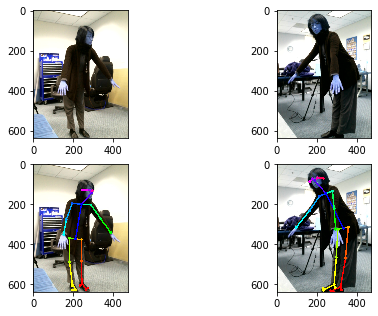

In [16]:
# set up matplotlib imshow table
wid=1100
hei=2000
fig=plt.figure(figsize=(8, 8))
co = len(cameras)
ro = 3
i=1
%cd C:\Users\Morio Murase\seat\download\openpose

time.sleep(3)
    
for cam in cameras: 
    # take picture with cameras
    s, img = cam.read()
    # undistort
    img = cv2.undistort(img, mtx, dist, None, newcameramtx)
    # crop the image
    img = img[y:y+h, x:x+w]
    # rotate image
    rows,cols,color = img.shape
    M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
    (tx,ty) = ((640-480)/2,(480-640)/2)
    M[0,2] -= tx #third column of matrix holds translation, which takes effect after rotation.
    M[1,2] -= ty
    img = cv2.warpAffine(img,M,(rows,cols))    
    # save the image
    directory = "capturedImages\image" + str(i) + ".jpg"
    cv2.imwrite(directory,img)
    # plot the image
    fig.add_subplot(ro, co, i)
    plt.imshow(img)
    i+=1

# run openpose on images stored in capturedImages folder
!bin\OpenPoseDemo.exe --image_dir capturedImages --write_keypoint OpenPoseKeypoints --write_images OpenPoseProcessedImages --net_resolution "176x320" 

# optain processed images and keypoints data
c_check = [0,1,8,9,10,11,12,13,14] # important keypoints are
conf_thres = 0.8 ###################### confidence threshold is
print("confidence threshold is ", conf_thres)
points = [[],[]] # points[[(x1,y1),(x2,y2)...],[(x1,y1),(x2,y2)...]]
skip_lines = 6
i=1
for cam in cameras:
    directory = "OpenPoseProcessedImages\image" + str(i) + "_rendered.png"
    img = cv2.imread(directory)
    fig.add_subplot(ro, co, i+len(cameras))
    plt.imshow(img)
    directory = "OpenPoseKeypoints\image" + str(i) + "_pose.yml"
    with open(directory) as infile:
        for k in range(skip_lines):
            _=infile.readline()
        data_ = yaml.load(infile, Loader=yaml.FullLoader)
    kp_data=np.asarray(list(data_.values()))
    for j in range(int(len(kp_data[0,:])/3)):
        # check confidence.  if it is lower than threshold, get another image and keypoints data set 
        if kp_data[0,3*j+2]<conf_thres and (3*j+2) in c_check:
            # get another picture and keypoints data ################################################################
            print("confidence smaller than ", conf_thres)
        points[i-1].append((int(kp_data[0,3*j]),(int(kp_data[0,3*j+1]))))    
    i+=1
plt.show()

# # calculate length of the body parts
# # get pixel length
# length = []
# lines = [(0,1),(1,8),(9,10),(10,11),(12,13),(13,14)]

# for i in lines:
#     (a,b) = i
#     (x1,y1) = points[a]
#     (x2,y2) = points[b]
#     length.append(np.sqrt(np.abs(x1-x2)*np.abs(x1-x2)+np.abs(y1-y2)*np.abs(y1-y2))*pix2len)

# # take average 
# length[2] = (length[2]+length[4])/2
# length[3] = (length[3]+length[5])/2
# del length[4:]
# print(length)


## 3D Reconstruction

In [ ]:
# # capture video from multiple cameras
# #cam2 = cv2.VideoCapture(2) ############## takes few seconds to finish this command
# #cam3 = cv2.VideoCapture(3) ############## takes few seconds to finish this command
# # Capture frame-by-frame
# ret, frame = cam2.read()
# ret, frame2 = cam3.read()
# %cd C:\Users\Morio Murase\seat\download\openpose
# cv2.imwrite("capturedImages\image1.jpg",frame)
# cv2.imwrite("capturedImages\image2.jpg",frame2)

C:\Users\Morio Murase\seat\download\openpose\examples\media\calibrate21


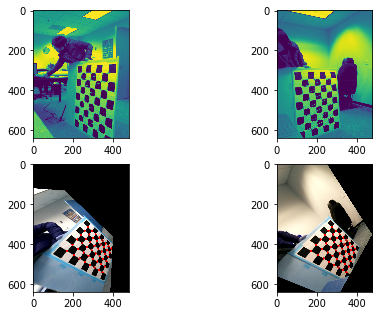

In [10]:
# get extrinsic matrix from two images

# glab images with chessboard pattern
%cd C:\Users\Morio Murase\seat\download\openpose\examples\media\calibrate21
images = glob.glob('*.jpg')

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*8,3), np.float32)
objp[:,:2] = np.mgrid[0:8,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [[],[]] # 3d point in real world space
imgpoints = [[],[]] # 2d points in image plane.

#rotate image
rows,cols = 480,640
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
(tx,ty) = ((cols-rows)/2,(rows-cols)/2)
M[0,2] -= tx #third column of matrix holds translation, which takes effect after rotation.
M[1,2] -= ty

# set up matplotlib imshow table
wid=1100
hei=2000
fig=plt.figure(figsize=(8, 8))
co = len(images)
ro = 3
p = 1

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # rotate image
    rotate = cv2.warpAffine(gray,M,(rows,cols)) 
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(rotate, (6,8), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints[p-1]=objp
        corners2 = cv2.cornerSubPix(rotate,corners, (11,11), (-1,-1), criteria)
        imgpoints[p-1]=corners2
        # Draw and display the corners
        cv2.drawChessboardCorners(rotate, (6,8), corners2, ret)
        # plot the image
        fig.add_subplot(ro, co, p)
        plt.imshow(rotate)
        p+=1

retval1, rvec1, tvec1 = cv2.solvePnP(objpoints[0][:], imgpoints[0][:], newcameramtx, dist, useExtrinsicGuess = False)
retval2, rvec2, tvec2 = cv2.solvePnP(objpoints[1][:], imgpoints[1][:], newcameramtx, dist, useExtrinsicGuess = False)

fundamental, inliner = cv2.findFundamentalMat(np.array(imgpoints[0][:]), np.array(imgpoints[1][:]), method=cv2.FM_8POINT)

retval, H1, H2 = cv2.stereoRectifyUncalibrated(imgpoints[0][:], imgpoints[1][:], fundamental, (480,640),10)

img1 = cv2.imread(r'C:\Users\Morio Murase\seat\download\openpose\examples\media\calibrate21\im1.jpg')
img2 = cv2.imread(r'C:\Users\Morio Murase\seat\download\openpose\examples\media\calibrate21\im2.jpg')
rotate1 = cv2.warpAffine(img1,M,(rows,cols))
rotate2 = cv2.warpAffine(img2,M,(rows,cols))

warped1 = cv2.warpPerspective(rotate1, H1, (480,640))
warped2 = cv2.warpPerspective(rotate2, H2, (480,640))

newimgpoints1 = cv2.perspectiveTransform(imgpoints[0][:],H1)
newimgpoints2 = cv2.perspectiveTransform(imgpoints[1][:],H2)

for point in newimgpoints1:
    cv2.circle(warped1, (point[0][0],point[0][1]), 3, color=[255,0,0], thickness=3)
for point in newimgpoints2:
    cv2.circle(warped2, (point[0][0],point[0][1]), 3, color=[255,0,0], thickness=3)

fig.add_subplot(ro,co,3)
plt.imshow(warped1)
fig.add_subplot(ro,co,4)
plt.imshow(warped2)

plt.show()

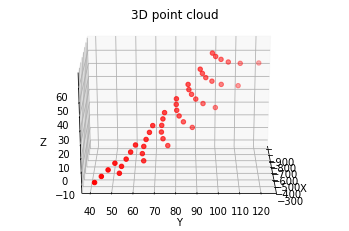

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [13]:
rotation_mat = np.zeros(shape=(3, 3))
R = cv2.Rodrigues(rvec1, rotation_mat)[0]
P1 = np.column_stack((np.matmul(newcameramtx,R), tvec1))
R = cv2.Rodrigues(rvec2, rotation_mat)[0]
P2 = np.column_stack((np.matmul(newcameramtx,R), tvec2))

points4D = cv2.triangulatePoints(P1, P2, newimgpoints1, newimgpoints2) 
# convert from homogeneous coordinates to 3D
points3D = points4D[:3,:]/np.stack((points4D[3,:],points4D[3,:],points4D[3,:]))


from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')

X =np.append(np.append(points3D[0,:4],points3D[0,6:11]),points3D[0,12:])
Y =np.append(np.append(points3D[1,:4],points3D[1,6:11]),points3D[1,12:])
Z =np.append(np.append(points3D[2,:4],points3D[2,6:11]),points3D[2,12:])


ax.scatter(X,Y,Z, c='r', marker='o')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('3D point cloud')

# rotate the axes and update
for angle in range(0, 360):
    ax.view_init(20, angle)
    plt.draw()
    plt.pause(.001)

plt.show()


In [202]:
print(points3D)

[[ 2.58620501e+00  2.90175319e+00  3.58867002e+00  5.52179384e+00
   2.68588276e+01 -5.61657953e+00  2.40103388e+00  2.53067303e+00
   2.74209189e+00  3.14842916e+00  3.99234271e+00  6.40507269e+00
   2.25594664e+00  2.26771855e+00  2.32220602e+00  2.41258597e+00
   2.55506992e+00  2.78781366e+00  2.13716340e+00  2.09404349e+00
   2.07056284e+00  2.05451775e+00  2.04264164e+00  2.05649757e+00
   2.04681587e+00  1.97193086e+00  1.91255009e+00  1.85596251e+00
   1.80100346e+00  1.74487865e+00  1.97533011e+00  1.88858199e+00
   1.81140816e+00  1.73910415e+00  1.67342865e+00  1.59221029e+00
   1.91869867e+00  1.82803178e+00  1.74324894e+00  1.65574956e+00
   1.57978427e+00  1.49951828e+00  1.87170291e+00  1.78176641e+00
   1.69134545e+00  1.60614491e+00  1.51863205e+00  1.44335222e+00]
 [ 1.15308990e+02  1.65709183e+02  2.68947571e+02  5.47670776e+02
   3.62271143e+03 -1.06712305e+03  1.09214966e+02  1.43549881e+02
   1.98255219e+02  2.92480133e+02  4.81789124e+02  1.02852661e+03
   1.0304

### save the data

In [ ]:
# rename with timestamp and move processed data to storage folder
import datetime
dt = str(datetime.datetime.now())
dt = dt[5:7]+"_" +dt[8:10]+ "_" + dt[11:13] + dt[14:16]
import os
newname = "OpenPoseDataStorage\image_rendered_" + dt + ".png"
os.rename("OpenPoseProcessedImages\image_rendered.png", newname)
newname = "OpenPoseDataStorage\image_pose" + dt + ".yml"
os.rename("OpenPoseKeypoints\image_pose.yml", newname)

# remove captured image
try: 
    os.remove("capturedImages\image.jpg")
except: 
    print("error")
    pass

# # change directory
# %cd C:\Users\Morio Murase\seat\download\openpose
# take picture with camera 2
# s, img2 = cam2.read()
# imname = "OpenPoseDataStorage\SeatingImage_" + dt + ".png"
# cv2.imwrite(imname,img2)
# plt.imshow(img2)

### close the display, and release camera 

In [ ]:
# When everything done, release the capture
cam2.release()
cam3.release()
#cam2.release()
cv2.destroyAllWindows()

In [ ]:
cv2.destroyAllWindows()